<a href="https://colab.research.google.com/github/r2x4/consolidado_practice/blob/main/consolidado_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traer los Datos

In [1]:
import pandas as pd

In [2]:
datos = pd.read_excel('/content/BD_Consolidado.xls')

In [3]:
datos.sample(5)

,idRegistro,fecha,id_Cliente,idPrograma,nombre_servicio,id_agente,agente,tiempo_logueo,tiempo_disponible,tiempo_no_listo,...,veces_internas,tiempo_consulta,veces_consulta,hold_in,hold_out,hold_internas,hold_consulta,tiempo_ringing,tiempo_dialing,Pais
2477,1310436,2018-12-28,999,789,Atencion Medica,23,Jhon Chavarria,07:36:24,01:38:20,00:04:31,...,0,01:44:58,17,00:19:52,00:01:17,00:00:00,00:00:00,00:00:03,00:00:00,Colombia
5092,1257235,2018-12-02,999,789,Atencion Medica,58,Natalia Maya,06:47:18,00:52:45,00:01:12,...,0,00:28:03,5,00:19:39,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,Colombia
2876,1266555,2018-12-08,999,789,Atencion Medica,48,Luisa Velez,05:56:14,03:17:45,00:02:02,...,0,00:45:14,5,00:11:37,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,Colombia
6078,1301035,2018-12-21,999,789,Atencion Medica,37,Karen Yepes,05:45:28,00:55:28,00:02:46,...,1,01:11:37,16,00:05:33,00:00:11,00:00:00,00:00:00,00:00:02,00:00:00,Peru
1252,1270088,2018-12-07,999,789,Atencion Medica,71,Yenny Serna,08:34:31,02:33:04,00:05:56,...,0,02:09:34,32,00:09:46,00:00:00,00:00:00,00:00:00,00:00:02,00:00:00,Colombia


In [4]:
datos['id_agente'] = datos['agente'].astype('category').cat.codes + 1


In [5]:
# Asegúrate de que los nombres de país están estandarizados (sin espacios o mayúsculas inconsistentes)
datos['Pais'] = datos['Pais'].str.strip().str.capitalize()

# Creamos un diccionario de mapeo
mapa_paises = {'Colombia': 1, 'Peru': 2}

# Creamos la columna id_pais usando el diccionario
datos['id_pais'] = datos['Pais'].map(mapa_paises)


In [6]:
datos.describe()

,idRegistro,fecha,id_Cliente,idPrograma,id_agente,veces_no_listo,tiempo_acw,veces_acw,llamadas_in,llamadas_out,veces_internas,veces_consulta,id_pais
count,8.120000e+03,8120,8120.0,8120.0,8120.000000,8120.000000,8120.0,8120.0,8120.00000,8120.000000,8120.000000,8120.000000,8120.000000
mean,1.307462e+06,2018-12-30 02:55:12.709359616,999.0,789.0,32.050246,71.768473,0.0,0.0,59.30000,1.446305,0.206897,13.518719,1.337931
min,1.248730e+06,2018-12-01 00:00:00,999.0,789.0,1.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,1.000000
25%,1.264397e+06,2018-12-08 00:00:00,999.0,789.0,14.000000,49.000000,0.0,0.0,40.00000,0.000000,0.000000,8.000000,1.000000
50%,1.284312e+06,2018-12-17 00:00:00,999.0,789.0,30.000000,74.000000,0.0,0.0,61.00000,1.000000,0.000000,13.000000,1.000000
75%,1.304164e+06,2018-12-24 00:00:00,999.0,789.0,49.000000,96.000000,0.0,0.0,79.00000,2.000000,0.000000,19.000000,2.000000
max,1.838152e+06,2020-02-14 00:00:00,999.0,789.0,79.000000,153.000000,0.0,0.0,124.00000,13.000000,10.000000,38.000000,2.000000
std,1.157643e+05,NaN,0.0,0.0,21.933297,31.384030,0.0,0.0,26.09315,1.784780,0.634479,7.162561,0.473034


In [7]:
datos.head(2)

,idRegistro,fecha,id_Cliente,idPrograma,nombre_servicio,id_agente,agente,tiempo_logueo,tiempo_disponible,tiempo_no_listo,...,tiempo_consulta,veces_consulta,hold_in,hold_out,hold_internas,hold_consulta,tiempo_ringing,tiempo_dialing,Pais,id_pais
0,1248732,2019-12-02,999,789,Atencion Medica,1,Alejandro Zuluaga,06:42:51,02:22:21,00:02:57,...,00:28:17,6,00:30:40,00:01:30,00:00:00,00:00:00,00:00:00,00:00:00,Colombia,1
1,1248730,2019-12-03,999,789,Atencion Medica,1,Alejandro Zuluaga,08:31:15,02:27:28,00:03:59,...,01:07:23,14,00:17:59,00:00:03,00:00:00,00:00:00,00:00:01,00:00:00,Colombia,1


In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8120 entries, 0 to 8119
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idRegistro         8120 non-null   int64         
 1   fecha              8120 non-null   datetime64[ns]
 2   id_Cliente         8120 non-null   int64         
 3   idPrograma         8120 non-null   int64         
 4   nombre_servicio    8120 non-null   object        
 5   id_agente          8120 non-null   int8          
 6   agente             8120 non-null   object        
 7   tiempo_logueo      8120 non-null   object        
 8   tiempo_disponible  8120 non-null   object        
 9   tiempo_no_listo    8120 non-null   object        
 10  veces_no_listo     8120 non-null   int64         
 11  tiempo_acw         8120 non-null   int64         
 12  veces_acw          8120 non-null   int64         
 13  tiempo_in          8120 non-null   object        
 14  llamadas

In [9]:
datos.dtypes

,0
idRegistro,int64
fecha,datetime64[ns]
id_Cliente,int64
idPrograma,int64
nombre_servicio,object
id_agente,int8
agente,object
tiempo_logueo,object
tiempo_disponible,object
tiempo_no_listo,object


In [10]:
datos.to_csv('/content/datos.csv', index=False)

# Craer dataframe empleados

In [11]:
# crer dataframe empleados
empleados = datos[['id_agente', 'agente']].drop_duplicates().reset_index(drop=True)


In [12]:
empleados

,id_agente,agente
0,1,Alejandro Zuluaga
1,2,Angie Alvarez
2,3,Astrid Restrepo
3,4,Carolina Osorio
4,6,Daniela Cordoba
...,...,...
74,77,Yuly Ortiz
75,78,Yury Cordero
76,79,Zully Pineda
77,5,Danie Gomez


In [13]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_agente  79 non-null     int8  
 1   agente     79 non-null     object
dtypes: int8(1), object(1)
memory usage: 843.0+ bytes


In [14]:
# exportar csv
empleados.to_csv('/content/empleados.csv', index=False)

In [15]:
# crer dataframe empleados
paises = datos[['Pais']].drop_duplicates().reset_index(drop=True)
paises['id_pais'] = paises.index + 1
paises = paises[['id_pais', 'Pais']]


In [16]:
paises

,id_pais,Pais
0,1,Colombia
1,2,Peru


In [17]:
# exportar csv
paises.to_csv('/content/paises.csv', index=False)

In [29]:
# llamar datos
datos = pd.read_csv('/content/datos.csv')

In [30]:
datos.sample(4)

,idRegistro,fecha,id_Cliente,idPrograma,nombre_servicio,id_agente,agente,tiempo_logueo,tiempo_disponible,tiempo_no_listo,...,tiempo_consulta,veces_consulta,hold_in,hold_out,hold_internas,hold_consulta,tiempo_ringing,tiempo_dialing,Pais,id_pais
7999,1276337,2018-12-13,999,789,Atencion Medica,33,Juan Estrada,08:33:10,02:26:29,00:12:13,...,00:54:23,19,00:29:11,00:00:36,00:00:00,00:00:00,00:00:10,00:00:00,Peru,2
7178,1294222,2018-12-17,999,789,Atencion Medica,62,Oscar Osorno,02:04:26,00:36:56,00:00:39,...,00:45:06,8,00:03:24,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,Colombia,1
3917,1289584,2018-12-18,999,789,Atencion Medica,32,Juan Castrillon,08:06:47,02:03:38,00:03:55,...,01:41:04,18,00:09:55,00:00:00,00:00:00,00:00:00,00:00:01,00:00:00,Peru,2
220,1274001,2018-12-11,999,789,Atencion Medica,12,Eliana Lopez,08:07:46,02:06:21,00:09:43,...,01:58:56,23,00:06:23,00:00:00,00:00:00,00:00:00,00:00:03,00:00:00,Colombia,1


In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8120 entries, 0 to 8119
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idRegistro         8120 non-null   int64 
 1   fecha              8120 non-null   object
 2   id_Cliente         8120 non-null   int64 
 3   idPrograma         8120 non-null   int64 
 4   nombre_servicio    8120 non-null   object
 5   id_agente          8120 non-null   int64 
 6   agente             8120 non-null   object
 7   tiempo_logueo      8120 non-null   object
 8   tiempo_disponible  8120 non-null   object
 9   tiempo_no_listo    8120 non-null   object
 10  veces_no_listo     8120 non-null   int64 
 11  tiempo_acw         8120 non-null   int64 
 12  veces_acw          8120 non-null   int64 
 13  tiempo_in          8120 non-null   object
 14  llamadas_in        8120 non-null   int64 
 15  tiempo_out         8120 non-null   object
 16  llamadas_out       8120 non-null   int64 


In [32]:
# Lista de columnas de tiempo
columnas_tiempo = [
    'tiempo_logueo', 'tiempo_disponible', 'tiempo_no_listo',
    'tiempo_in', 'tiempo_out', 'tiempo_internas',
    'tiempo_consulta', 'hold_in', 'hold_out',
    'hold_internas', 'hold_consulta',
    'tiempo_ringing', 'tiempo_dialing'
]

# Convertir a tipo timedelta
for col in columnas_tiempo:
    datos[col] = pd.to_timedelta(datos[col])


In [33]:
datos.sample(4)

,idRegistro,fecha,id_Cliente,idPrograma,nombre_servicio,id_agente,agente,tiempo_logueo,tiempo_disponible,tiempo_no_listo,...,tiempo_consulta,veces_consulta,hold_in,hold_out,hold_internas,hold_consulta,tiempo_ringing,tiempo_dialing,Pais,id_pais
1851,1264245,2018-12-07,999,789,Atencion Medica,30,Jose Ardila,0 days 05:11:36,0 days 01:18:23,0 days 00:07:23,...,0 days 00:45:51,11,0 days 00:04:52,0 days,0 days,0 days,0 days 00:00:04,0 days,Peru,2
6368,1308956,2018-12-28,999,789,Atencion Medica,14,Erika Arias,0 days 06:26:26,0 days 01:09:26,0 days 00:02:56,...,0 days 01:04:32,8,0 days 00:43:59,0 days,0 days,0 days,0 days 00:00:07,0 days,Colombia,1
744,1290945,2018-12-18,999,789,Atencion Medica,45,Leidy Arroyave,0 days 08:14:19,0 days 02:09:18,0 days 00:09:06,...,0 days 01:14:20,23,0 days 00:08:48,0 days,0 days,0 days,0 days 00:00:07,0 days,Colombia,1
2008,1264886,2018-12-10,999,789,Atencion Medica,39,Karen Yepes,0 days 07:45:04,0 days 01:52:17,0 days 00:02:26,...,0 days 00:54:10,15,0 days 00:16:41,0 days,0 days,0 days,0 days 00:00:04,0 days,Peru,2


In [34]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8120 entries, 0 to 8119
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   idRegistro         8120 non-null   int64          
 1   fecha              8120 non-null   object         
 2   id_Cliente         8120 non-null   int64          
 3   idPrograma         8120 non-null   int64          
 4   nombre_servicio    8120 non-null   object         
 5   id_agente          8120 non-null   int64          
 6   agente             8120 non-null   object         
 7   tiempo_logueo      8120 non-null   timedelta64[ns]
 8   tiempo_disponible  8120 non-null   timedelta64[ns]
 9   tiempo_no_listo    8120 non-null   timedelta64[ns]
 10  veces_no_listo     8120 non-null   int64          
 11  tiempo_acw         8120 non-null   int64          
 12  veces_acw          8120 non-null   int64          
 13  tiempo_in          8120 non-null   timedelta64[n

In [19]:
# exportar csv
paises.to_csv('/content/paises.csv', index=False)

# **graficar**

In [21]:
# graficar
import plotly.express as px

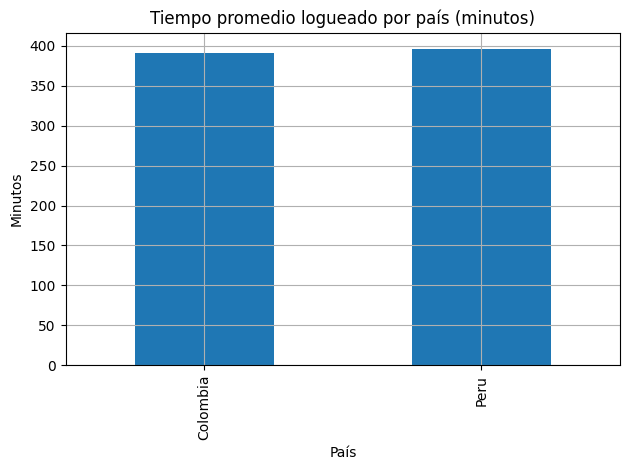

In [35]:
import matplotlib.pyplot as plt

datos.groupby("Pais")["tiempo_logueo"].mean().dt.total_seconds().div(60).plot(kind="bar")

plt.title("Tiempo promedio logueado por país (minutos)")
plt.xlabel("País")
plt.ylabel("Minutos")
plt.grid(True)
plt.tight_layout()
plt.show()


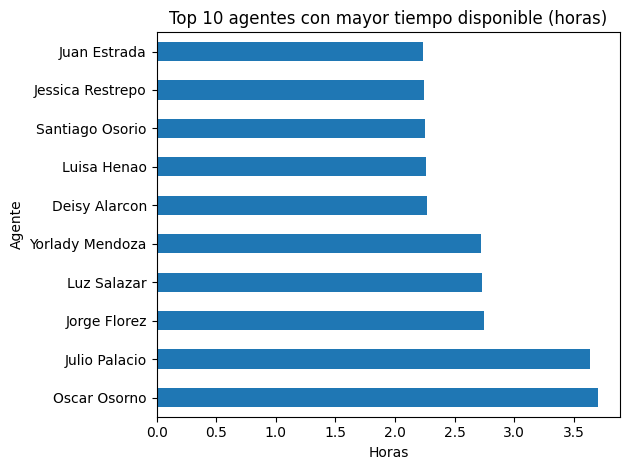

In [36]:
top_disponibles = (
    datos.groupby("agente")["tiempo_disponible"]
    .mean()
    .dt.total_seconds()
    .div(3600)
    .sort_values(ascending=False)
    .head(10)
)

top_disponibles.plot(kind='barh')
plt.title("Top 10 agentes con mayor tiempo disponible (horas)")
plt.xlabel("Horas")
plt.ylabel("Agente")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1783355179.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  hold = hold.applymap(lambda x: x.total_seconds() / 60)


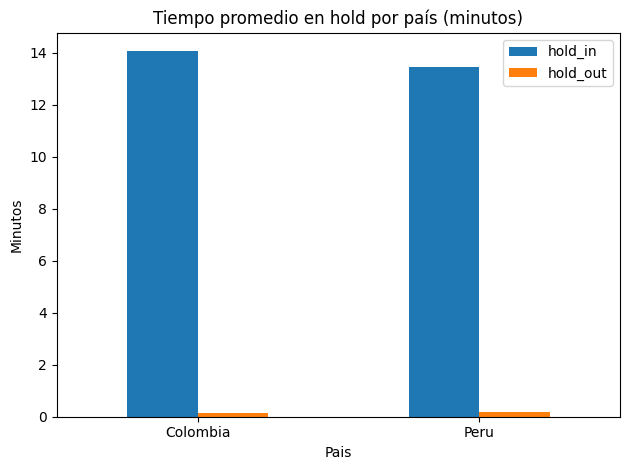

In [37]:
hold = datos.groupby("Pais")[["hold_in", "hold_out"]].mean()
hold = hold.applymap(lambda x: x.total_seconds() / 60)

hold.plot(kind="bar")
plt.title("Tiempo promedio en hold por país (minutos)")
plt.ylabel("Minutos")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


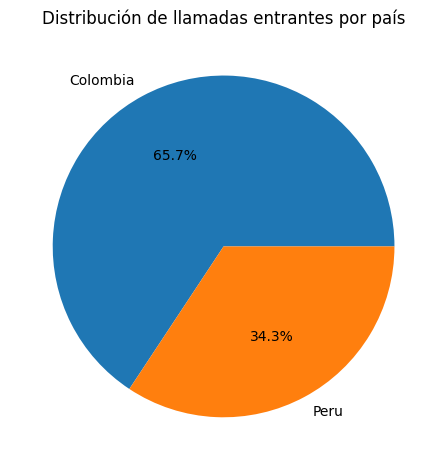

In [38]:
datos.groupby("Pais")["llamadas_in"].sum().plot(kind="pie", autopct='%1.1f%%')

plt.title("Distribución de llamadas entrantes por país")
plt.ylabel("")
plt.tight_layout()
plt.show()


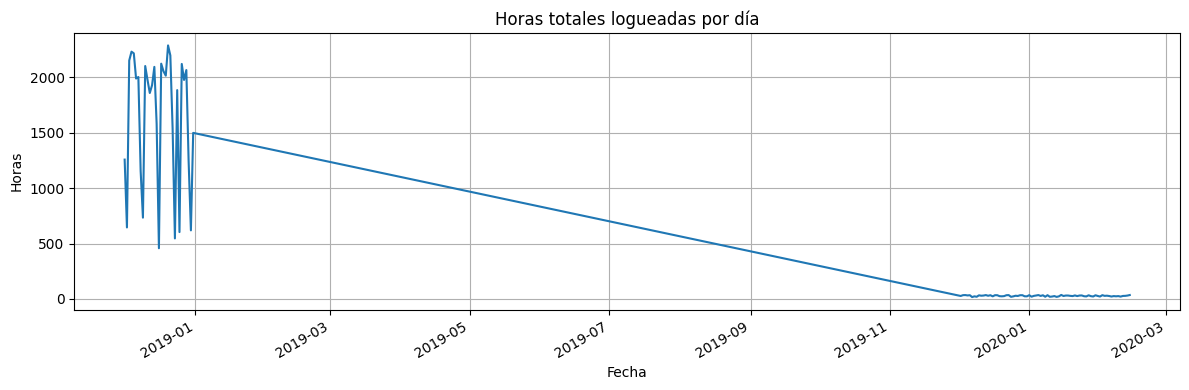

In [39]:
# Convertimos fecha si aún está como texto
datos["fecha"] = pd.to_datetime(datos["fecha"])

logueo_diario = (
    datos.groupby("fecha")["tiempo_logueo"]
    .sum()
    .dt.total_seconds()
    .div(3600)
)

logueo_diario.plot(figsize=(12, 4))
plt.title("Horas totales logueadas por día")
plt.xlabel("Fecha")
plt.ylabel("Horas")
plt.grid(True)
plt.tight_layout()
plt.show()
